#### Variabel steglengde

Bruker her innebygde par av orden $p$ og $\hat{p}$. Feilestimatet beregnes etter følgende $est_{n+1} = |y_{n+1}-\hat{y_{n+1}}|$. Hvis estimatet ikke er mindre enn den brukerspesifiserte toleransen endrer man steglengden $h$ til 

$$
h^* = \alpha h (\frac{tol}{||est||})^{\frac{1}{p}}.
$$
$\alpha$ er her en pessimistfaktor mindre enn 1.

Noen metoder er såkalte FSAL (first same as last), noe som betyr at den første verdien $k_1$ er den samme som den siste $k$'en i det forrige steget, hvis steget blir akseptert. Derfor kan man skrive koden raskere med færre funksjonsevalueringer. Dette gjelder blant annet for metoden Bogacki_Shampine.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def method_Bogacki(yn,tn,h,f):   #Dette er ikke den mest effektive metoden siden vi beregner k1 flere ganger
    k1 = f(tn, yn)
    k2 = f(tn + 0.5*h,yn + 0.5*h*k1)
    k3 = f(tn + 0.75*h,yn + 0.75*h*k2)
    yn_p = yn + h*(2*k1+3*k2+4*k3)/9
    tn_p = tn + h
    k4 = f(tn+h,yn_p)
    est = np.linalg.norm(h*(2*k1+3*k2+4*k3)/9-h*(7*k1+6*k2+8*k3+3*k4)/24)  #trenger ikke å finne y^, holder med est.
    return yn_p, tn_p, est

#fungerer kun for flere dimensjoner
#f: y'=f(t,y)
#method av typen p(p^). order = p.
def variable_stepSize(t0,tend,y0,f,method,h0,tol,alpha,order):  
    h = h0
    T = [t0, 0]
    Y = np.zeros((len(y0),2)) 
    Y[0] = y0
    n = 0
    while tend - T[n] > 0:
        h = min(h,tend-T[n])
        Y[n+1], T[n+1], est = method(Y[n],T[n],h,f)
        if est<tol:
            n+=1
            if T[n] != tend: #for å ikke legge til 0 på slutten
                T.append(0)
                Y = np.vstack((Y,y0))
        h *= alpha*(tol/est)**(1.0/order)  #her finner vi ny h uansett om steget ble akseptert
    T = np.array(T)
    return T, Y

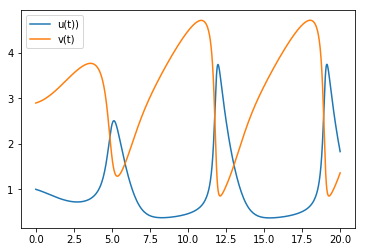

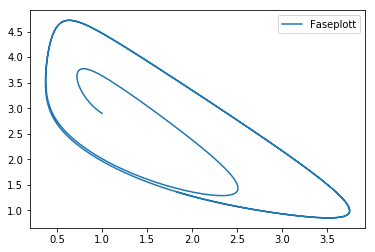

In [41]:
def Brusselator(t,y):
    return np.array([1+y[0]**2*y[1]-4*y[0],3*y[0]-y[0]**2*y[1]])

y0 = np.array([1, 2.9]) 
T, Y = variable_stepSize(0,20,y0,Brusselator,method_Bogacki,0.1,1e-5,0.9,3)
u = Y[:, 0]
v = Y[:, 1]

plt.plot(T,u, label="u(t))")
plt.plot(T,v, label="v(t)")
plt.legend()
plt.show()

plt.plot(u, v, label="Faseplott")
plt.legend()
plt.show()


#for å finne hvordan steglengden endrer seg;
#h = np.zeros(len(T)-1)
#for i in range(len(T)-1):
#    h[i] = T[i+1]-T[i]

#plt.plot(T[:-1],h, label="skrittlengde h")
#plt.legend()
#plt.show()